In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import glob as glob

In [2]:
f = "../data/001_raw/conjunto_de_datos/17mun.shp"
mapa = gpd.read_file(f)
mapa

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,17002,17,002,Atlatlahucan,"POLYGON ((2828922.538 781263.995, 2828781.555 ..."
1,17006,17,006,Cuautla,"POLYGON ((2821551.215 769623.608, 2821667.352 ..."
2,17028,17,028,Xochitepec,"POLYGON ((2789590.426 761948.527, 2789616.333 ..."
3,17022,17,022,Tetela del Volcán,"POLYGON ((2853410.981 783725.795, 2853045.022 ..."
4,17009,17,009,Huitzilac,"POLYGON ((2791085.02 791719.336, 2800576.257 7..."
5,17016,17,016,Ocuituco,"POLYGON ((2843302.649 776207.749, 2843396.277 ..."
6,17008,17,008,Emiliano Zapata,"POLYGON ((2791988.297 767534.485, 2791995.528 ..."
7,17003,17,003,Axochiapan,"POLYGON ((2845021.03 738895.887, 2845054.809 7..."
8,17036,17,036,Hueyapan,"POLYGON ((2850431.316 771994.367, 2850445.782 ..."
9,17035,17,035,Xoxocotla,"POLYGON ((2786278.495 750567.983, 2786283.647 ..."


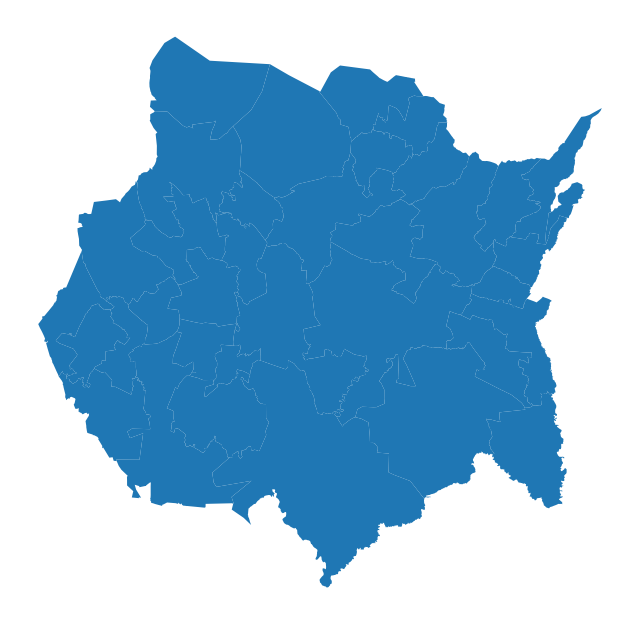

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))
mapa.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [4]:
f = "../data/001_raw/ITER_17CSV20.csv"
mor = pd.read_csv(f)
mor.columns

Index(['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'LONGITUD',
       'LATITUD', 'ALTITUD', 'POBTOT',
       ...
       'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ',
       'VPH_SINRTV', 'VPH_SINLTC', 'VPH_SINCINT', 'VPH_SINTIC', 'TAMLOC'],
      dtype='object', length=286)

In [5]:
pob_mun = pd.DataFrame( mor.groupby(by=["NOM_MUN"])["POBTOT"].sum()).reset_index()
pob_mun = pob_mun[pob_mun["NOM_MUN"] != "Total de la entidad Morelos"]
pob_mun

,NOM_MUN,POBTOT
0,Amacuzac,35222
1,Atlatlahucan,50484
2,Axochiapan,78404
3,Ayala,179828
4,Coatetelco,22704
5,Coatlán del Río,21873
6,Cuautla,374267
7,Cuernavaca,756977
8,Emiliano Zapata,214139
9,Hueyapan,15738


In [6]:
mapa_pop = mapa.merge(
    pob_mun[["NOM_MUN", "POBTOT"]],
    left_on="NOMGEO",
    right_on="NOM_MUN",
    how="left"
)
mapa_pop

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,NOM_MUN,POBTOT
0,17002,17,002,Atlatlahucan,"POLYGON ((2828922.538 781263.995, 2828781.555 ...",Atlatlahucan,50484
1,17006,17,006,Cuautla,"POLYGON ((2821551.215 769623.608, 2821667.352 ...",Cuautla,374267
2,17028,17,028,Xochitepec,"POLYGON ((2789590.426 761948.527, 2789616.333 ...",Xochitepec,147168
3,17022,17,022,Tetela del Volcán,"POLYGON ((2853410.981 783725.795, 2853045.022 ...",Tetela del Volcán,29757
4,17009,17,009,Huitzilac,"POLYGON ((2791085.02 791719.336, 2800576.257 7...",Huitzilac,49036
5,17016,17,016,Ocuituco,"POLYGON ((2843302.649 776207.749, 2843396.277 ...",Ocuituco,38471
6,17008,17,008,Emiliano Zapata,"POLYGON ((2791988.297 767534.485, 2791995.528 ...",Emiliano Zapata,214139
7,17003,17,003,Axochiapan,"POLYGON ((2845021.03 738895.887, 2845054.809 7...",Axochiapan,78404
8,17036,17,036,Hueyapan,"POLYGON ((2850431.316 771994.367, 2850445.782 ...",Hueyapan,15738
9,17035,17,035,Xoxocotla,"POLYGON ((2786278.495 750567.983, 2786283.647 ...",Xoxocotla,55623


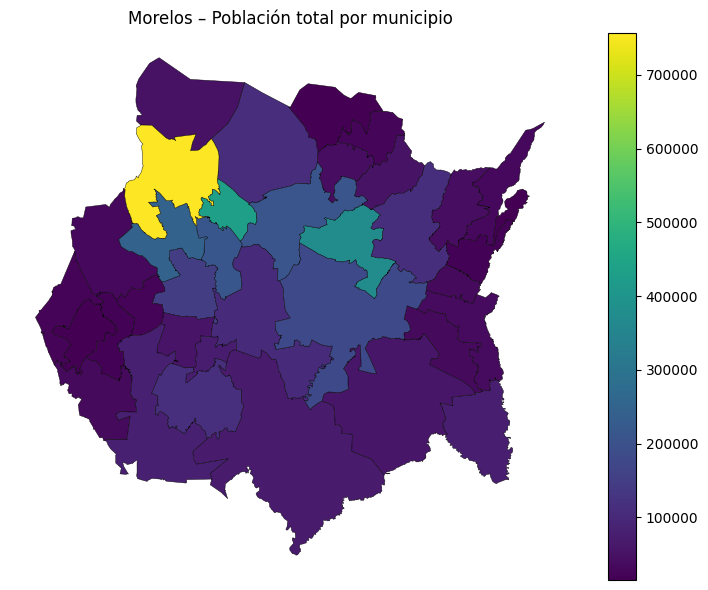

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

mapa_pop.plot(
    column="POBTOT",
    ax=ax,
    legend=True,
    edgecolor="black",
    linewidth=0.3,
    cmap="viridis"   # puedes cambiar la paleta
)

ax.set_title("Morelos – Población total por municipio")
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [8]:
mapa_pop.sort_values(by="POBTOT")

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,NOM_MUN,POBTOT
18,17021,17,021,Tetecala,"POLYGON ((2773511.272 752796.801, 2773553.97 7...",Tetecala,15255
8,17036,17,036,Hueyapan,"POLYGON ((2850431.316 771994.367, 2850445.782 ...",Hueyapan,15738
20,17023,17,023,Tlalnepantla,"POLYGON ((2816646.759 790325.078, 2816778.87 7...",Tlalnepantla,15891
33,17014,17,014,Mazatepec,"POLYGON ((2775204.616 754130.641, 2775228.247 ...",Mazatepec,19317
34,17032,17,032,Zacualpan de Amilpas,"POLYGON ((2846960.999 766996.126, 2847067.121 ...",Zacualpan de Amilpas,19957
31,17005,17,005,Coatlán del Río,"POLYGON ((2770909.806 759628.118, 2770921.083 ...",Coatlán del Río,21873
13,17034,17,034,Coatetelco,"POLYGON ((2785081.727 757120.359, 2785280.94 7...",Coatetelco,22704
14,17027,17,027,Totolapan,"POLYGON ((2823710.328 786152.01, 2823793.835 7...",Totolapan,25515
3,17022,17,022,Tetela del Volcán,"POLYGON ((2853410.981 783725.795, 2853045.022 ...",Tetela del Volcán,29757
22,17015,17,015,Miacatlán,"POLYGON ((2779292.573 772486.637, 2779299.799 ...",Miacatlán,31620
